Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Rebecca de Feijter (10639918)

Tessa Ridderikhoff (10759697)

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence t

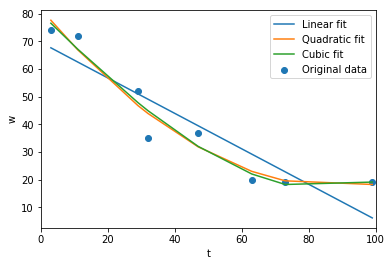

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)


# linear equation (w = m*t + c)
Alin = np.vstack([t, np.ones(len(t))]).T
m, c = np.linalg.lstsq(Alin, w)[0]

fig, ax = plt.subplots()
ax.scatter(t, w, label = "Original data")
ax.plot(t, m*t + c, label = "Linear fit")
ax.set_xlim(0, 100)

# quadratic equation (w = a*t^2 + b*t + c)
Aqua = np.vstack([np.ones(len(t)), t, t**2]).T
c, b, a = np.linalg.lstsq(Aqua, w)[0]

ax.plot(t, a*(t**2) + b*t + c, label = "Quadratic fit")

# cubic function (w = a*t^3 + b*t^2 + c*t + d)
Acub = np.vstack([np.ones(len(t)), t, t**2, t**3]).T
d, c, b, a = np.linalg.lstsq(Acub, w)[0]

ax.plot(t, a*(t**3) + b*(t**2) + c*t + d, label = "Cubic fit")

ax.legend(fontsize = "medium")
ax.set_xlabel("t")
ax.set_ylabel("w")
plt.show()

<font color=red>You don't show the functions with enough resolution. You shouldn't only use the data points provivded, but evaluate your function on a linspace. For functions that are as easy to evaluate as polynomials, you should really have one point per pixel of the resulting image. -½ point</font>

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [5]:
# condition number linear Vandermonde matrix
print(np.linalg.cond(Alin))

# condition number quadratic Vandermonde matrix
print(np.linalg.cond(Aqua))

# condition number cubic Vandermonde matrix
print(np.linalg.cond(Acub))

95.9797884438
10562.2147892
1192946.87716


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


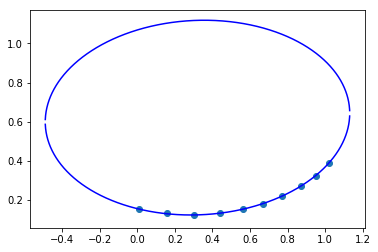

In [5]:
# original observed data
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

# create matrix
planetA = np.vstack([y**2, x*y, x, y, np.ones(len(y))]).T

# determine least squares solution
a, b, c, d, e = np.linalg.lstsq(planetA, x**2)[0]

# plot original data
fig, ax = plt.subplots()
ax.scatter(x,y)

# plot entire orbit of fitted function 
allx = np.linspace(-2.0, 2.0, 10000.0)
ax.plot(allx, (np.sqrt((b*allx + d)**2 - 4*a*(c*allx+e-allx**2)) - b*allx - d)/ (2*a), c = "b")
ax.plot(allx, (-np.sqrt((b*allx + d)**2 - 4*a*(c*allx+e-allx**2)) - b*allx - d)/ (2*a), c = "b")

plt.show()

<font color=red>if the function you're evaluating is this simple, you can put more points in your linspace to make the gaps at the side smaller.</font>

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in sqrt


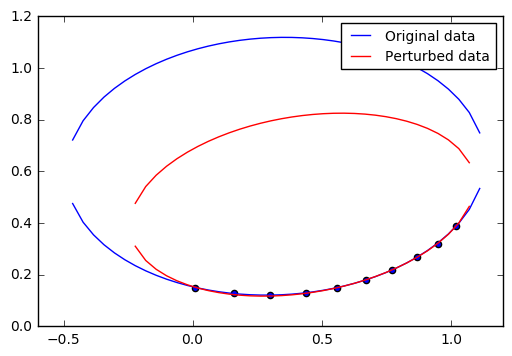

-2.63562548371 0.143646182599 0.55144696314 3.22294033811 -0.432894270264
-3.54211266566 0.853117305061 0.446992081442 2.97775895167 -0.375525770675
0.906487181947 -0.709471122462 0.104454881699 0.245181386438 -0.0573684995894


In [65]:
# define min and max values of noise
minv = -0.005
maxv = 0.005

# create function to add noise to x and y
def noisearrays(x,y):
    xnoise = []
    ynoise = []
    
    for i in list(range(0, len(x))):
        xnoise.append(x[i] + (minv + np.random.rand() * (maxv - minv)))
        ynoise.append(y[i] + (minv + np.random.rand() * (maxv - minv)))
    
    # put x and y with noise in new array
    xnoise = np.array(xnoise, dtype = np.float)
    ynoise = np.array(ynoise, dtype = np.float)
    
    return xnoise, ynoise

# create x and y with random noise
xnoise, ynoise = noisearrays(x,y)

# determine least squares solution with noise for x and y
planetB = np.vstack([ynoise**2, xnoise*ynoise, xnoise, ynoise, np.ones(len(ynoise))]).T
ap, bp, cp, dp, ep = np.linalg.lstsq(planetB, xnoise**2)[0]

# plot original and perturbed fitted functions
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(allx, (np.sqrt((b*allx + d)**2 - 4*a*(c*allx+e-allx**2)) - b*allx - d)/ (2*a), c = "b", label = "Original data")
ax.plot(allx, (np.sqrt((bp*allx + dp)**2 - 4*ap*(cp*allx+ep-allx**2)) - bp*allx - dp)/ (2*ap), c = "r", label = "Perturbed data")
ax.plot(allx, (-np.sqrt((b*allx + d)**2 - 4*a*(c*allx+e-allx**2)) - b*allx - d)/ (2*a), c = "b")
ax.plot(allx, (-np.sqrt((bp*allx + dp)**2 - 4*ap*(cp*allx+ep-allx**2)) - bp*allx - dp)/ (2*ap), c = "r")

ax.legend(fontsize = "medium")
plt.show()

# parameter values
print a, b, c, d, e
print ap, bp, cp, dp, ep

# difference parameters
print a-ap, b-bp, c-cp, d-dp, e-ep

When the above cell is run multiple times, it can be seen that the orbit for the perturbed data is different each time. It can be very similar to the orbit of the original data, but it can be much smaller or bigger as well, or vary in shape. Naturally, this is caused by the parameter values of a, b, c, d and e, which are relatively very different for the perturbed data. Considering the small perturbation of the original data, the effect is remarkably large.

## (c)
Can you explain this behaviour?

The function with the perturbed data seems to fit the original data points just as well as the function based on the original data, but the complete orbit of these functions can vary widely. Because the problem is rank deficient, the data points are not all completely independent and therefore there is insufficient data to be the fit on. Small perturbations can therefore have considerably big effects, especially if you imagine that it probably concerns thousands of kilometers in the orbit of a planet.

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Tessa Ridderikhoff\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in sqrt


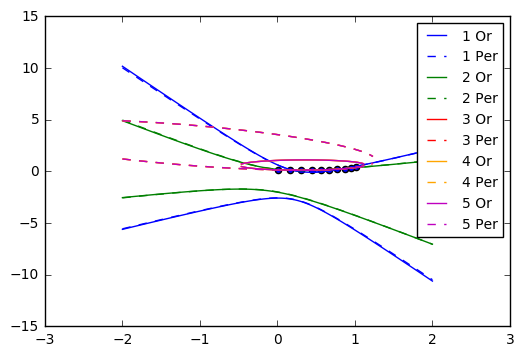

In [60]:
# create perturbed data
noisex, noisey = noisearrays(x,y)

# create matrix with perturbed data
planetD = np.vstack([noisey**2, noisex*noisey, noisex, noisey, np.ones(len(noisey))]).T

# plot original data
fig, ax = plt.subplots()
ax.scatter(x,y)

# define colors for in plot for each k
colors = ("", "b", "g", "r", "orange", "m")

for k in list(range(1,6)):
    
    # parameters original data
    a, b, c, d, e = np.linalg.lstsq(planetA, x**2, rcond=10**-k)[0]
    
    # parameters perturbed data
    ap, bp, cp, dp, ep = np.linalg.lstsq(planetD, noisex**2, rcond=10**-k)[0]
    
    # plot fitted functions
    ax.plot(allx, (np.sqrt((b*allx + d)**2 - 4*a*(c*allx+e-allx**2)) - b*allx - d)/ (2*a), label="%i Or" %(k), c = colors[k])
    ax.plot(allx, (np.sqrt((bp*allx + dp)**2 - 4*ap*(cp*allx+ep-allx**2)) - bp*allx - dp)/ (2*ap), label="%i Per" %(k), c = colors[k], linestyle = "dashed")
    ax.plot(allx, (-np.sqrt((b*allx + d)**2 - 4*a*(c*allx+e-allx**2)) - b*allx - d)/ (2*a), c = colors[k])
    ax.plot(allx, (-np.sqrt((bp*allx + dp)**2 - 4*ap*(cp*allx+ep-allx**2)) - bp*allx - dp)/ (2*ap), c = colors[k], linestyle = "dashed")
    
ax.legend(fontsize = "medium")
plt.show()


The bigger k gets, the better the fit. With a tolerance of 10^-1 or 10^-2, the fitted function will not even be an orbit, as too many values are rounded to zero. When k is equal to or higher than 3, the resulting orbits are very similar, so much even that they overlap in the plot and the functions with some values of k can not be observed. This leads to the conclusion that for this case, a tolerance of at least 10^-3 is required for an accurate fitting of the function.

Remarkable is that the perturbed data does not have an effect on the fitted functions when k is 1 or 2, which can be explained by the small perturbation size between -0.005 and 0.005. With a tolerance of 10^-1 (0.1) or 10^-2 (0.01), this perturbation has no effect on the least squares solution. When the tolerance is 10^-3, only than is the noise in the data of effect on the least squares solution, and therefore on the parameter values. 

<font color=green>Good work!</font>